## EDA on more WB data

### Import libraries and data

In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

cwd = os.getcwd()
parent_path = os.path.dirname(cwd)
print(parent_path)

/Users/margheritaphilipp/Documents/margherita/GitHub/brushup_2025


In [71]:
# import result from first cleaning notebook
df = pd.read_csv(parent_path + "/data/WB_reshaped_nomissing.csv")

df.sample(4)

,isocode,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
243,LVA,Latvia,2015,2.04,14580.0,2.882495e+10,1977527,100.01
372,STP,Sao Tome and Principe,2015,9.62,1400.0,2.794871e+08,200291,88.82
438,TGO,Togo,2020,1.13,860.0,7.483901e+09,8669720,87.49
181,HKG,"Hong Kong SAR, China",2015,0.88,41180.0,3.002241e+11,7291300,95.35


In [72]:
# check that the data types are still as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isocode                 488 non-null    object 
 1   country                 488 non-null    object 
 2   year                    488 non-null    int64  
 3   primary_out_school_pct  488 non-null    float64
 4   gni_pc                  488 non-null    float64
 5   gni                     488 non-null    float64
 6   pop                     488 non-null    int64  
 7   primary_compl_pct       488 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 30.6+ KB


In [73]:
# check if numerical columns mane sense
df.describe()

,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
count,488.00000,488.000000,488.000000,4.880000e+02,4.880000e+02,488.000000
mean,2012.60041,9.176434,13909.385246,3.034380e+11,2.726480e+07,87.881598
std,10.64193,13.178682,19240.328081,1.590619e+12,1.003601e+08,19.010011
min,1990.00000,0.000000,120.000000,6.192111e+07,9.992000e+03,15.820000
25%,2000.00000,1.232500,1705.000000,6.206171e+09,1.944139e+06,84.057500
50%,2015.00000,3.955000,5290.000000,3.051271e+10,7.010940e+06,95.550000
75%,2020.00000,11.207500,17940.000000,1.746524e+11,2.115674e+07,99.475000
max,2022.00000,77.750000,95600.000000,2.574080e+13,1.402618e+09,118.840000


In [74]:
# this would warrant looking at the metadata and additional documentation before proceeding (can you check the relevant file I shared?)
df.primary_compl_pct.nlargest(10)

440    118.84
280    113.49
117    112.71
149    111.73
161    111.29
314    110.82
407    108.24
254    108.12
453    107.80
159    107.13
Name: primary_compl_pct, dtype: float64

### Groupby reminder

Let's get a feel for changes per country

In [92]:
# in order to aggregate like this, the values need to already be numerical

df_gb = df.groupby(['country'])['gni_pc'].agg(['min', 'mean', 'max'])
df_gb

,min,mean,max
country,,,
Albania,4410.0,5516.666667,6820.0
Algeria,1600.0,3568.000000,5390.0
Andorra,42450.0,42450.000000,42450.0
Antigua and Barbuda,14550.0,14550.000000,14550.0
Argentina,7400.0,10190.000000,12500.0
...,...,...,...
"Venezuela, RB",4070.0,4070.000000,4070.0
Viet Nam,390.0,1425.000000,2460.0
West Bank and Gaza,1550.0,3410.000000,4720.0


In [102]:
# what is different compared to the above? could you make it more efficient?
df_gb_2 = df.groupby(['country']).agg({
    'gni_pc': ['min', 'mean', 'max'],
    'gni': ['min', 'mean', 'max'],
    'primary_out_school_pct': ['min', 'mean', 'max'],
    'pop': ['min', 'mean', 'max'],
    }
    )

In [99]:
df_gb_2[('gni_pc', 'min')]

country
Albania                 4410.0
Algeria                 1600.0
Andorra                42450.0
Antigua and Barbuda    14550.0
Argentina               7400.0
                        ...   
Venezuela, RB           4070.0
Viet Nam                 390.0
West Bank and Gaza      1550.0
Zambia                   350.0
Zimbabwe                1330.0
Name: (gni_pc, min), Length: 169, dtype: float64

In [104]:
# flatten the two-level column headigs/ indexes
# do you understand what the code is doing? what happens if you run this cell twice?
sep = "_"
df_gb_2.columns = (
    df_gb_2.columns.to_flat_index()                                  # tuples -> Index
              .map(lambda t: sep.join(str(x) for x in t if x is not None and x == x)))
df_gb_2

,g_n_i___p_c___m_i_n,g_n_i___p_c___m_e_a_n,g_n_i___p_c___m_a_x,g_n_i___m_i_n,g_n_i___m_e_a_n,g_n_i___m_a_x,p_r_i_m_a_r_y___o_u_t___s_c_h_o_o_l___p_c_t___m_i_n,p_r_i_m_a_r_y___o_u_t___s_c_h_o_o_l___p_c_t___m_e_a_n,p_r_i_m_a_r_y___o_u_t___s_c_h_o_o_l___p_c_t___m_a_x,p_o_p___m_i_n,p_o_p___m_e_a_n,p_o_p___m_a_x
country,,,,,,,,,,,,
Albania,4410.0,5516.666667,6820.0,1.271542e+10,1.558442e+10,1.893433e+10,0.21,4.2200,8.48,2777689,2.832080e+06,2880703
Algeria,1600.0,3568.000000,5390.0,4.948676e+10,1.409466e+11,2.158068e+11,0.30,3.9200,13.05,25375810,3.716374e+07,45477389
Andorra,42450.0,42450.000000,42450.0,3.284843e+09,3.284843e+09,3.284843e+09,8.92,8.9200,8.92,77380,7.738000e+04,77380
Antigua and Barbuda,14550.0,14550.000000,14550.0,1.301281e+09,1.301281e+09,1.301281e+09,0.98,0.9800,0.98,89409,8.940900e+04,89409
Argentina,7400.0,10190.000000,12500.0,2.755443e+11,4.410634e+11,5.432799e+11,0.50,0.7375,0.87,37213984,4.282272e+07,45407904
...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",4070.0,4070.000000,4070.0,9.973273e+10,9.973273e+10,9.973273e+10,9.06,9.0600,9.06,24526708,2.452671e+07,24526708
Viet Nam,390.0,1425.000000,2460.0,3.020357e+10,1.293010e+11,2.283984e+11,0.00,0.1750,0.35,77154011,8.498863e+07,92823254
West Bank and Gaza,1550.0,3410.000000,4720.0,4.537651e+09,1.544425e+10,2.381074e+10,5.94,7.2000,9.20,2922153,4.259782e+06,5043612


### Generating features: differences between rows and categorical cut-offs

In [78]:
# we can also create a change feature
# Why is sorting so important here?
# Why is the first value nan? What would adding .abs() do?

# Make sure data is sorted by year within each country
df = df.sort_values(['country', 'year'])

# Compute year-on-year absolute change in gni
df['change_gni_pc'] = df.groupby('country')['gni_pc'].diff() #.abs()

In [79]:
df.sort_values('change_gni_pc', ascending=False)

,isocode,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct,change_gni_pc
357,QAT,Qatar,2015,3.98,80370.0,1.884229e+11,2344557,94.37,63330.0
329,NOR,Norway,2015,0.53,93440.0,4.848049e+11,5188607,99.56,56840.0
261,MAC,"Macao SAR, China",2015,4.25,58150.0,3.738396e+10,642900,91.79,43530.0
420,CHE,Switzerland,2015,0.03,86810.0,7.190215e+11,8282396,96.63,42230.0
203,IRL,Ireland,2015,0.05,52400.0,2.463979e+11,4701957,98.71,28270.0
...,...,...,...,...,...,...,...,...,...
477,VEN,"Venezuela, RB",2000,9.06,4070.0,9.973273e+10,24526708,83.33,NaN
478,VNM,Viet Nam,2000,0.00,390.0,3.020357e+10,77154011,101.05,NaN
480,PSE,West Bank and Gaza,2000,7.40,1550.0,4.537651e+09,2922153,93.80,NaN
484,ZMB,Zambia,2000,31.68,350.0,3.487044e+09,10017631,60.55,NaN


In [80]:
# create a toy data frame to check what .diff() does

toy = pd.DataFrame({
    'day': [1,2,3,4,5,6],
    'value':[10,20,25,26,31,27]
})

toy['diff'] = toy['value'].diff()

toy

,day,value,diff
0,1,10,NaN
1,2,20,10.0
2,3,25,5.0
3,4,26,1.0
4,5,31,5.0
5,6,27,-4.0


Let's create a categorical feature. NB to do this in practice you would really neeed to justify the threholds.

In [81]:
income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

In [82]:
df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

income_group
high       152
low_mid    137
upp_mid    122
low         77
Name: count, dtype: int64

### Some more plotting

In [83]:
# what does this bit of code do?
df_highest_year = df.sort_values('year', ascending=False).drop_duplicates('country')
print(df_highest_year.year.unique())
df_highest_year

[2022 2020 2015 2000 1990]


,isocode,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct,change_gni_pc,income_group
487,ZWE,Zimbabwe,2022,5.59,1960.0,3.146984e+10,16069056,86.12,270.0,low_mid
315,NPL,Nepal,2022,1.01,1380.0,4.105974e+10,29715436,100.82,510.0,low_mid
101,HRV,Croatia,2022,1.73,19370.0,7.467935e+10,3855641,100.28,4250.0,high
336,OMN,Oman,2022,11.06,19270.0,9.115758e+10,4730226,86.59,2170.0,high
331,NOR,Norway,2022,0.95,94290.0,5.145269e+11,5457127,99.28,15680.0,high
...,...,...,...,...,...,...,...,...,...,...
233,KWT,Kuwait,2000,9.93,18810.0,3.676778e+10,1954709,94.22,NaN,high
477,VEN,"Venezuela, RB",2000,9.06,4070.0,9.973273e+10,24526708,83.33,NaN,low_mid
80,CAF,Central African Republic,1990,42.64,470.0,1.349588e+09,2871910,31.18,NaN,low
86,CHN,China,1990,8.47,330.0,3.748940e+11,1135185000,106.38,NaN,low


<Axes: >

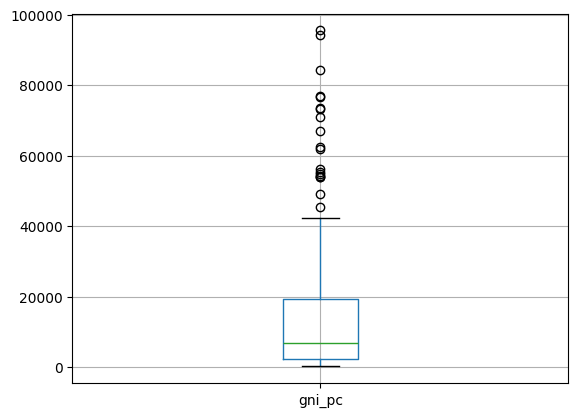

In [84]:
df_highest_year.boxplot(column='gni_pc')

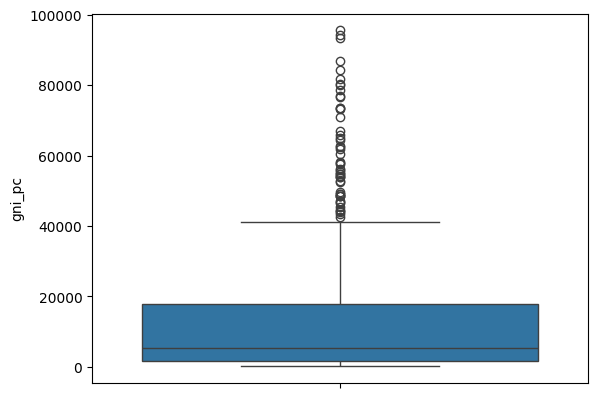

In [85]:
# what happens when you exchange y for x?
sns.boxplot(data=df, y='gni_pc')
plt.show()

In [86]:
df.iloc[df_highest_year.gni_pc.nlargest(10).index]

,isocode,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct,change_gni_pc,income_group
422,CHE,Switzerland,2022,0.26,95600.0,8.391282e+11,8777088,95.06,13860.0,high
331,NOR,Norway,2022,0.95,94290.0,5.145269e+11,5457127,99.28,15680.0,high
258,LUX,Luxembourg,2022,0.35,84200.0,5.498859e+10,653103,77.84,4110.0,high
467,USA,United States,2022,3.98,77060.0,2.574080e+13,334017321,95.74,12120.0,high
205,IRL,Ireland,2022,1.11,76660.0,3.995912e+11,5212836,96.47,12110.0,high
191,ISL,Iceland,2022,1.52,73620.0,2.812431e+10,382003,98.95,7750.0,high
116,DNK,Denmark,2022,0.59,73320.0,4.328160e+11,5903037,99.89,10610.0,high
359,QAT,Qatar,2022,7.61,71070.0,1.888627e+11,2657333,94.65,13340.0,high
385,SGP,Singapore,2022,0.93,66910.0,3.771978e+11,5637022,99.63,11130.0,high
417,SWE,Sweden,2022,0.57,62480.0,6.552491e+11,10486941,99.89,7800.0,high


<Axes: >

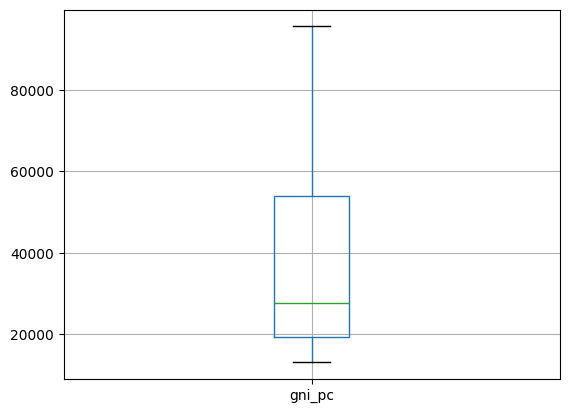

In [87]:
df_highest_year.loc[df_highest_year['income_group']=='high'].boxplot(column='gni_pc')

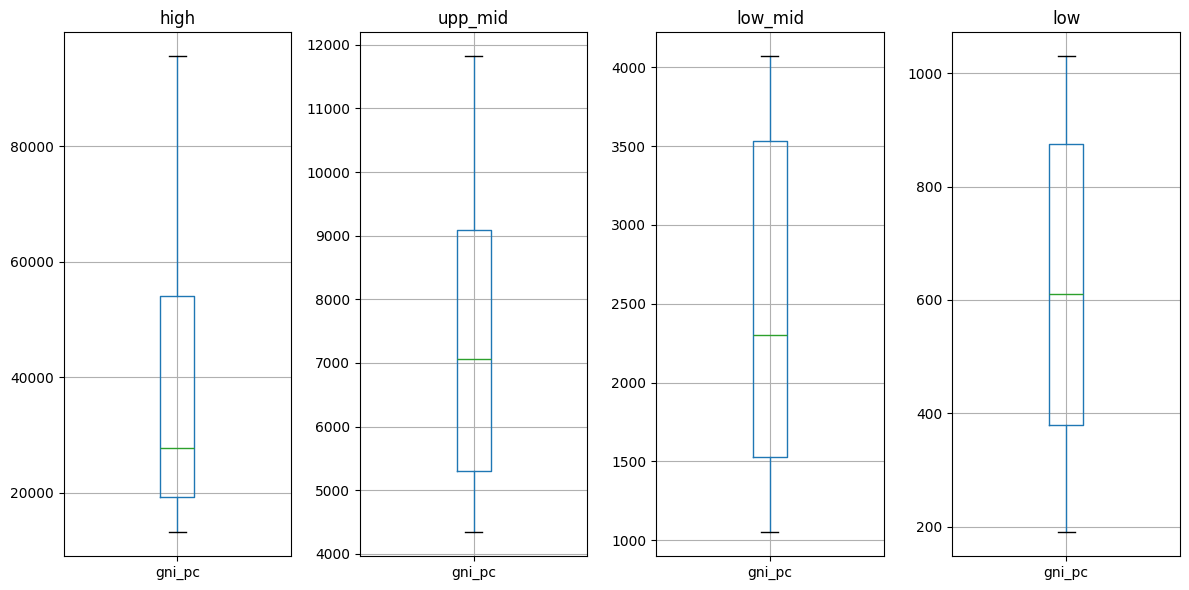

In [88]:
# what is misleading about the visualisation below?

groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == group].boxplot(column='gni_pc', ax=axes[i])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='gni_pc', ylabel='primary_out_school_pct'>

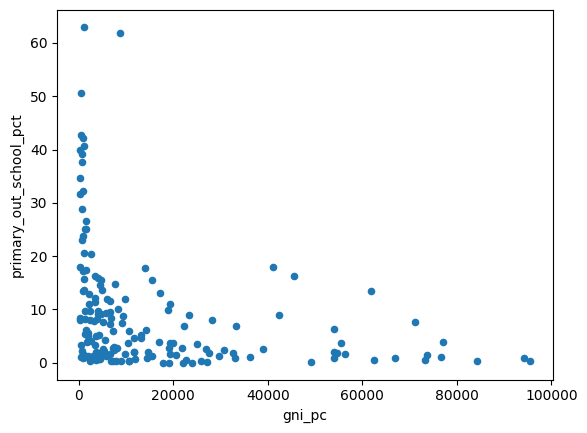

In [89]:
# pick a different combination of values to plot
df_highest_year.plot.scatter(x='gni_pc', y='primary_out_school_pct')

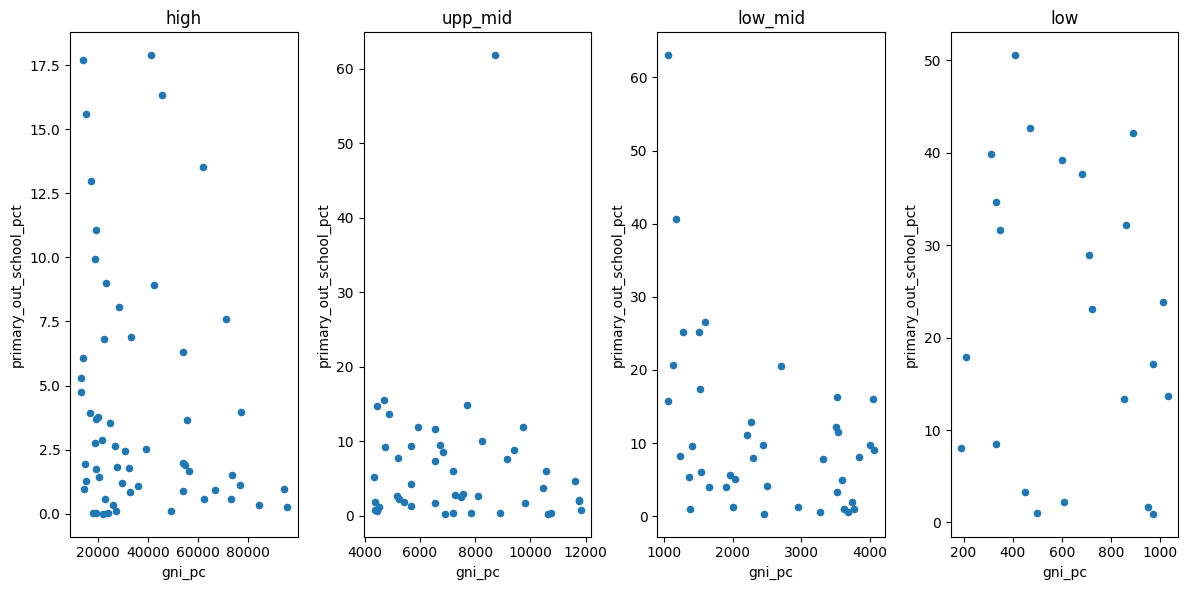

In [90]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == group].plot.scatter(x='gni_pc', y='primary_out_school_pct', ax=axes[i])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'gni_pc'}>]], dtype=object)

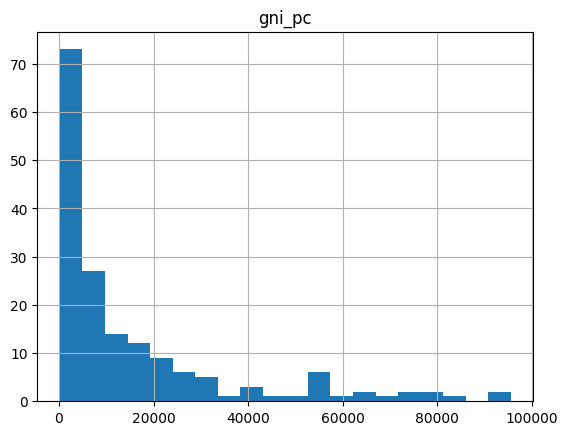

In [91]:
# can you create this with seaborn instead?
df_highest_year.hist(column=['gni_pc'], bins=20)